# HOTEL BOOKING PREDICTION

# Required libraries

In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
plt.rcParams['figure.figsize'] = [15, 6]
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import PowerTransformer

In [140]:
# reading the dataset

In [141]:
df = pd.read_csv('hotel_bookings.csv')

In [142]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [143]:
df.shape

(119390, 32)

In [144]:
# there are 119390 rows and 32 columns in this dataset

In [145]:
df.info() # checking the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Pre processing

In [146]:
# changing the columns to object datatype as they are categorical variables

In [147]:
df['agent'] = df['agent'].astype('object')

In [148]:
df[['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month']] = df[['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month']].astype(object)

In [149]:
df[['is_canceled','is_repeated_guest']] = df[['is_canceled','is_repeated_guest']].astype(object)

In [150]:
# dropping the redundant column reservation status as it provides the same meaning as is cancelled

In [151]:
df = df.drop('reservation_status',axis=1)

# Missing value analysis

In [152]:
# checking for null values
# missing value analysis

In [153]:
df.isnull().sum()/len(df)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [154]:
# as there are more than 90 percent missing values in the column agent, we are dropping the column

In [155]:
df = df.drop('company',axis=1)

In [156]:
# as the column country a categorical variable we are using mode to impute the null values

In [157]:
df["country"]=df["country"].fillna(df["country"].mode()[0])

In [158]:
# filling in the column children with median

In [159]:
df["children"]=df["children"].fillna(df["children"].median())

In [160]:
# filling in the column agent with mode as it is of object data type

In [161]:
df['agent'].mode()

0    9.0
Name: agent, dtype: object

In [162]:
df.loc[df['agent'].isnull(),'agent'] = 9.0

# EDA

# Seperating the numerical and categorical columns

In [163]:
numerical = df.select_dtypes(include=np.number)

In [164]:
categorical = df.select_dtypes(exclude=np.number)

In [165]:
numerical.describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,0.927599,2.500302,1.856403,0.103886,0.007949,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,106.863097,0.998613,1.908286,0.579261,0.398555,0.097436,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,160.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [166]:
categorical.describe()

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,agent,customer_type,reservation_status_date
count,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390.0,119390,119390
unique,2,2,3,12,53,31,5,177,8,5,2,10,12,3,333.0,4,926
top,City Hotel,0,2016,August,33,17,BB,PRT,Online TA,TA/TO,0,A,A,No Deposit,9.0,Transient,2015-10-21
freq,79330,75166,56707,13877,3580,4406,92310,49078,56477,97870,115580,85994,74053,104641,48301.0,89613,1461


# Heatmap to provide us with the insights about correlations among the numerical variables

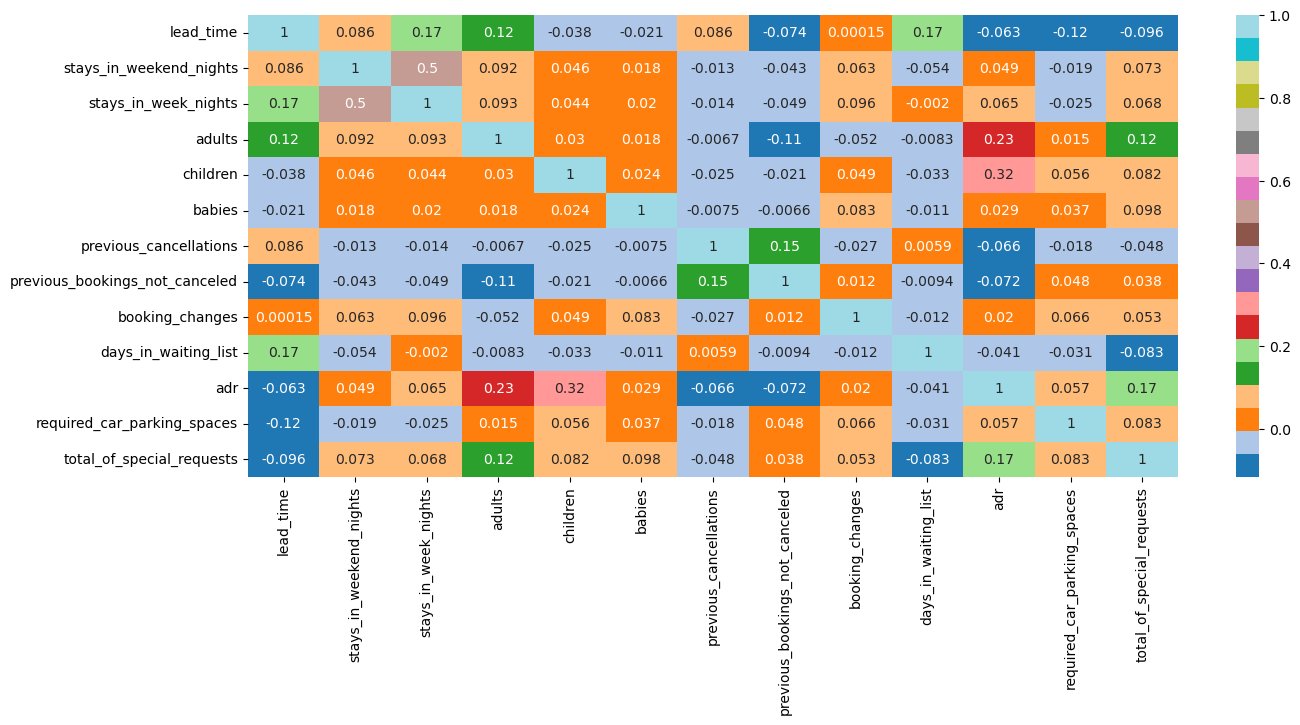

In [167]:
cmap = "tab20"
  
# plotting the heatmap
hm = sns.heatmap(data=numerical.corr(),
                cmap=cmap,
                annot=True)
  
# displaying the plotted heatmap
plt.show()

# Target variable analysis - Number of cancellations

In [168]:
canceled = len(df[df['is_canceled'] == 1])

In [169]:
not_canceled = len(df[df['is_canceled'] == 0])

In [170]:
print((df['is_canceled'].value_counts()))

0    75166
1    44224
Name: is_canceled, dtype: int64


In [171]:
print((df['is_canceled'].value_counts(normalize=True)*100))

0    62.958372
1    37.041628
Name: is_canceled, dtype: float64


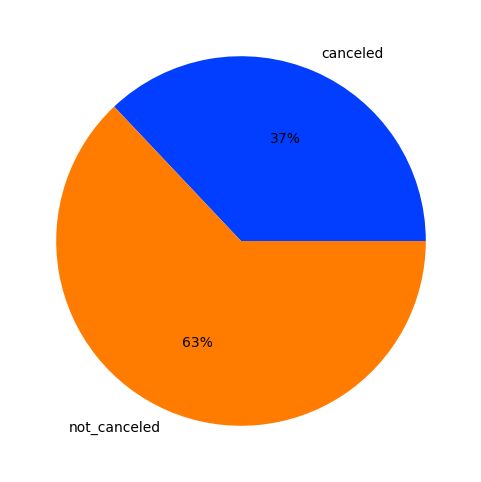

In [172]:
palette_color = sns.color_palette('bright')
plt.pie([canceled,not_canceled],labels=['canceled','not_canceled'],colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

<Axes: xlabel='is_canceled', ylabel='count'>

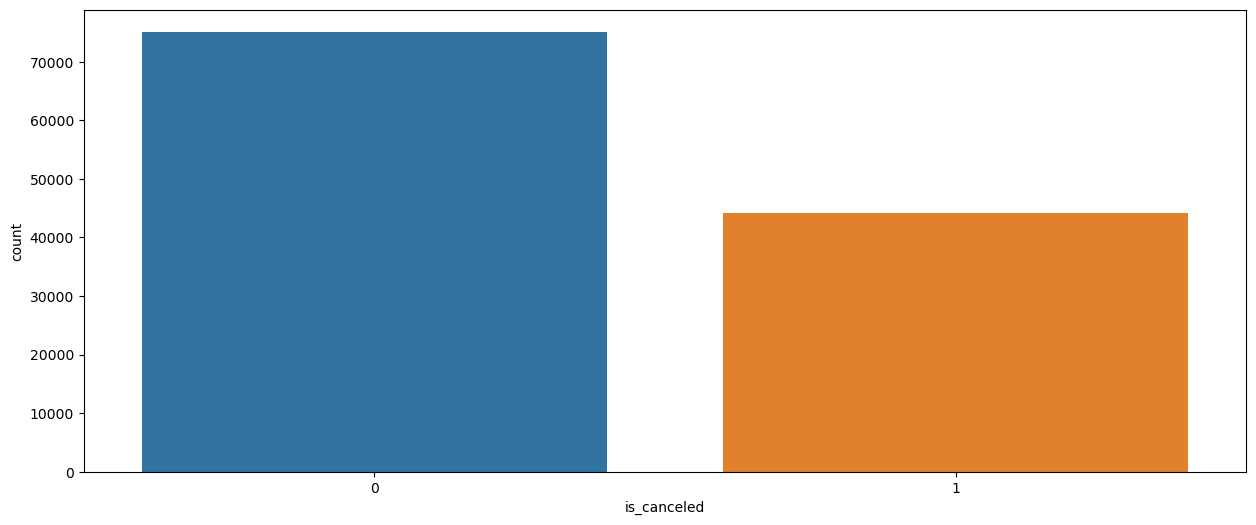

In [173]:
sns.countplot(x=df['is_canceled'])

There are 44224 cancellations which accounts for 37 percent of the total cancellations

# Univariate

In [174]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,9.0,0,Transient,0.0,0,0,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,9.0,0,Transient,0.0,0,0,2015-07-01


# Column - 'hotel' 

In [175]:
df['hotel'].value_counts(normalize = True)*100

City Hotel      66.446101
Resort Hotel    33.553899
Name: hotel, dtype: float64

<Axes: xlabel='hotel', ylabel='count'>

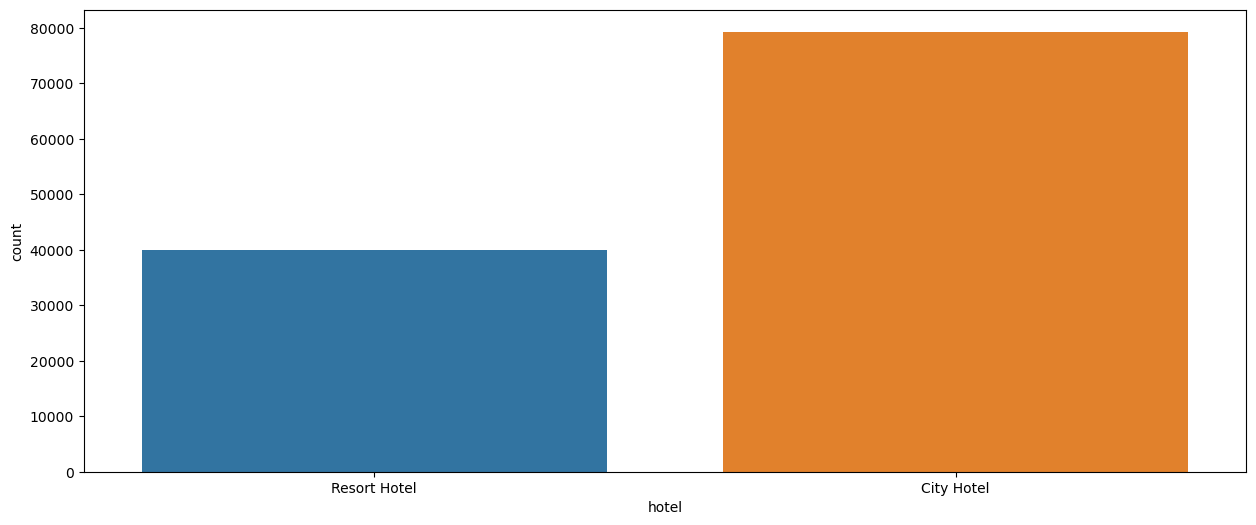

In [176]:
sns.countplot(x=df['hotel'])

In [177]:
# inference 

# we can see that the variable 'hotel has two subclasses 
# 66% of the hotels are 'city hotel'
# 33% of the hotels are 'resort hotel'
# with the data we can see that there are double the amount of bookings in 'city hotel' than 'resort hotel'

# Column - 'lead_time' 

<Axes: ylabel='Density'>

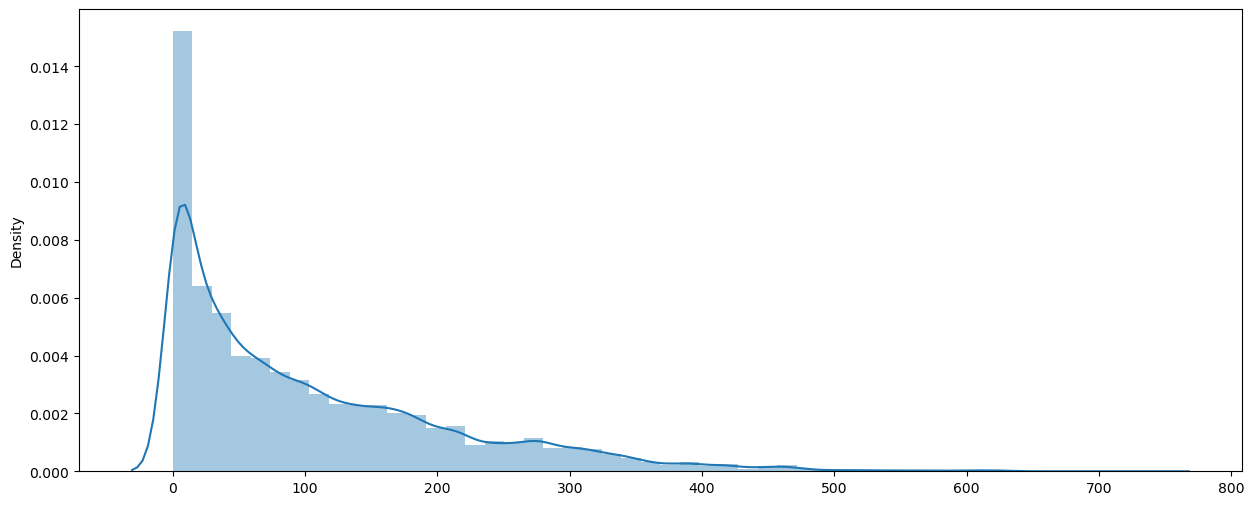

In [178]:
sns.distplot(x=df['lead_time'])

In [179]:
df['lead_time'].skew()

1.3465498727254268

In [180]:
# inference 

# Number of days that elapsed between the entering date of the booking into the system and the arrival date
# from the above graph we can see that most of the people arrive immediately after date of booking 
# people who book in advance are less 
# the data is highly right skewed 

# Column - 'arrival_date_year' 

In [181]:
df['arrival_date_year'].value_counts(normalize=True)*100

2016    47.497278
2017    34.079069
2015    18.423654
Name: arrival_date_year, dtype: float64

<Axes: xlabel='arrival_date_year', ylabel='count'>

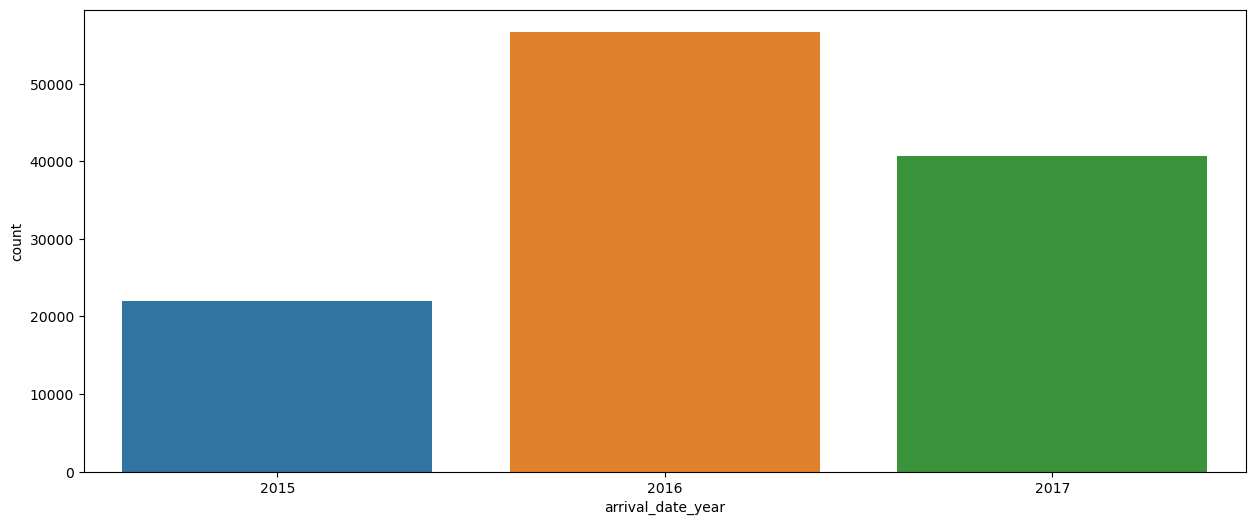

In [182]:
sns.countplot(x=df['arrival_date_year'])

In [183]:
# inference 
# we can see from the data that
# 34.0% of the data is from 2017
# 47.4% of the data is from 2016
# 18.4% of the data is from 2015
# it is observed that more people have visited hotels in the year 2016

# Column - 'arrival_date_month' 

In [184]:
df['arrival_date_month'].value_counts(normalize=True)*100

August       11.623252
July         10.604741
May           9.876037
October       9.347517
April         9.288048
June          9.162409
September     8.801407
March         8.203367
February      6.757685
November      5.690594
December      5.678868
January       4.966078
Name: arrival_date_month, dtype: float64

In [185]:
# inference 

# we can see that the hotel bookings are high in July and Augest 
# this hike in hotel bookings can be due to many reasons 
# Summer Vacation Season:
# In many countries, July and August coincide with the summer vacation season when schools are out, and families and individuals take extended breaks. This leads to increased travel and, consequently, higher hotel bookings.
# Good Weather:
# July and August are typically associated with warm weather and longer daylight hours in many parts of the world. This pleasant weather encourages people to travel, go on outdoor adventures, and visit tourist destinations.
# International Tourism:
# July and August are prime months for international travel, with tourists from around the world exploring different countries and regions. This influx of international travelers contributes to higher hotel occupancy rates.

# Column - 'stays_in_weekend_nights' 

In [186]:
df['stays_in_weekend_nights'].value_counts(normalize=True)*100

0     43.553061
2     27.898484
1     25.652065
4      1.553731
3      1.054527
6      0.128151
5      0.066170
8      0.050255
7      0.015914
9      0.009214
10     0.005863
12     0.004188
13     0.002513
16     0.002513
14     0.001675
18     0.000838
19     0.000838
Name: stays_in_weekend_nights, dtype: float64

<Axes: xlabel='stays_in_weekend_nights', ylabel='count'>

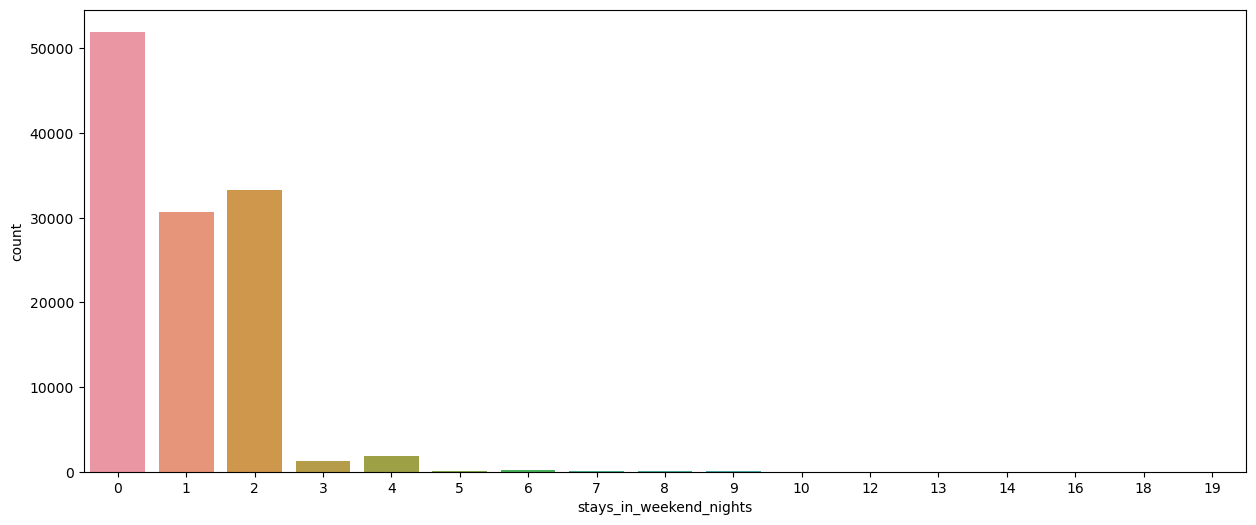

In [187]:
sns.countplot(x=df['stays_in_weekend_nights'])

In [188]:
# inference 

# Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
# we can see that most customers prefer to stay in the weekend nights mostly once or twice 
# 43.5% of the people do not prefer to stay in weekend nights 
# 25.7% of the people stay once in the weekend nights 
# 27.8% of the people stay twice in the weekend nights 
# Leisure and Getaways:
# Weekends offer a break from the routine of work and daily responsibilities, making them an ideal time for leisure travel. People take advantage of weekends to go on getaways, explore new places, and relax.
# Extended Vacations:
# Many travelers plan longer vacations that include weekends to maximize their time away from work. They may book hotel stays to cover both weekdays and weekends during these trips.

# Column - 'stays_in_week_nights' 

<Axes: xlabel='stays_in_week_nights', ylabel='count'>

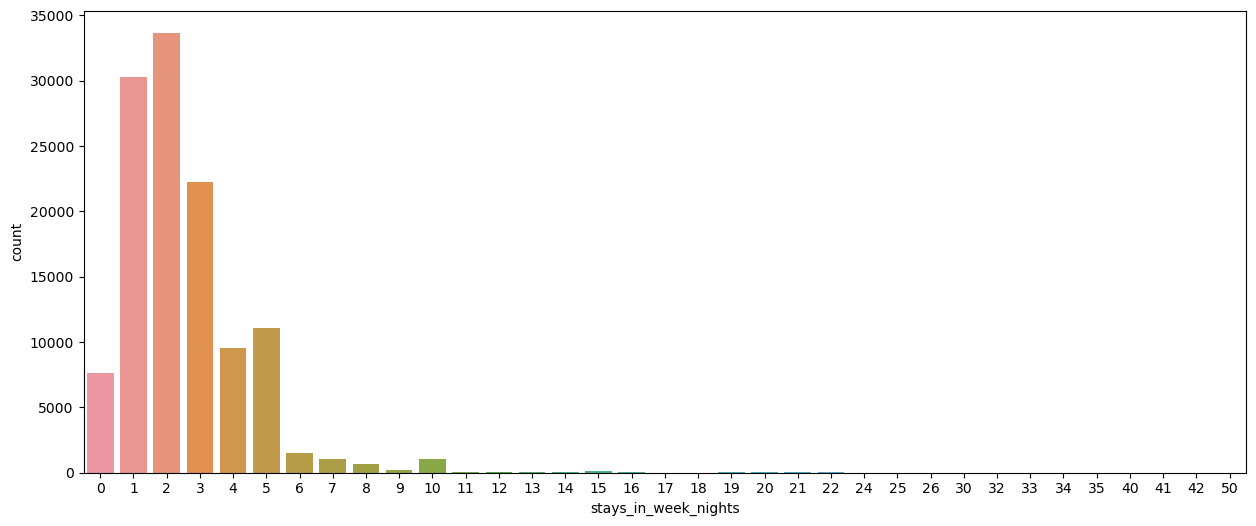

In [189]:
sns.countplot(x=df['stays_in_week_nights'])

In [190]:
# inference 

# Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
# from the data we can see that maximum people who who stay in week nights usually stay from one to three days 
# we can also observe that the data is highly skewed 
# Business Travel:
# Weeknight hotel stays are often driven by business travel. Professionals travel for work-related meetings, conferences, and training sessions during the workweek and may stay in hotels for convenience and proximity to their work commitments.

# Column - 'adults' 

In [191]:
df['adults'].value_counts(normalize=True)*100

2     75.115169
1     19.287210
3      5.194740
0      0.337549
4      0.051931
26     0.004188
27     0.001675
20     0.001675
5      0.001675
40     0.000838
50     0.000838
55     0.000838
6      0.000838
10     0.000838
Name: adults, dtype: float64

<Axes: xlabel='adults', ylabel='count'>

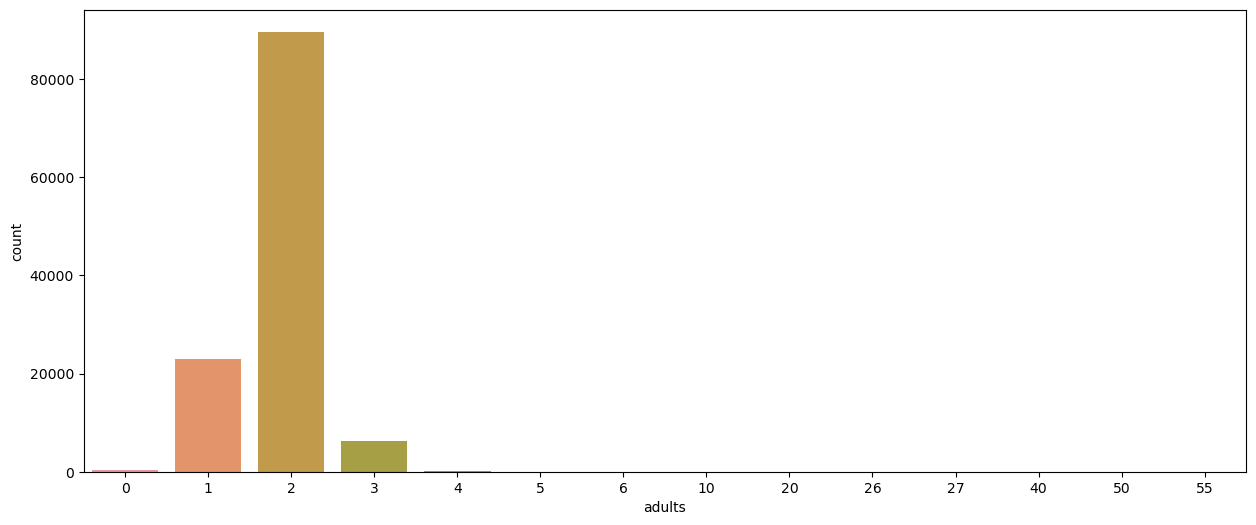

In [192]:
sns.countplot(x=df['adults'])

In [193]:
# inference 
# this column is for the count of adults 
# 75% of the customers come in twos 
# 19% of the customers come once

# To find the country where maximum no of bookings occured

<Axes: >

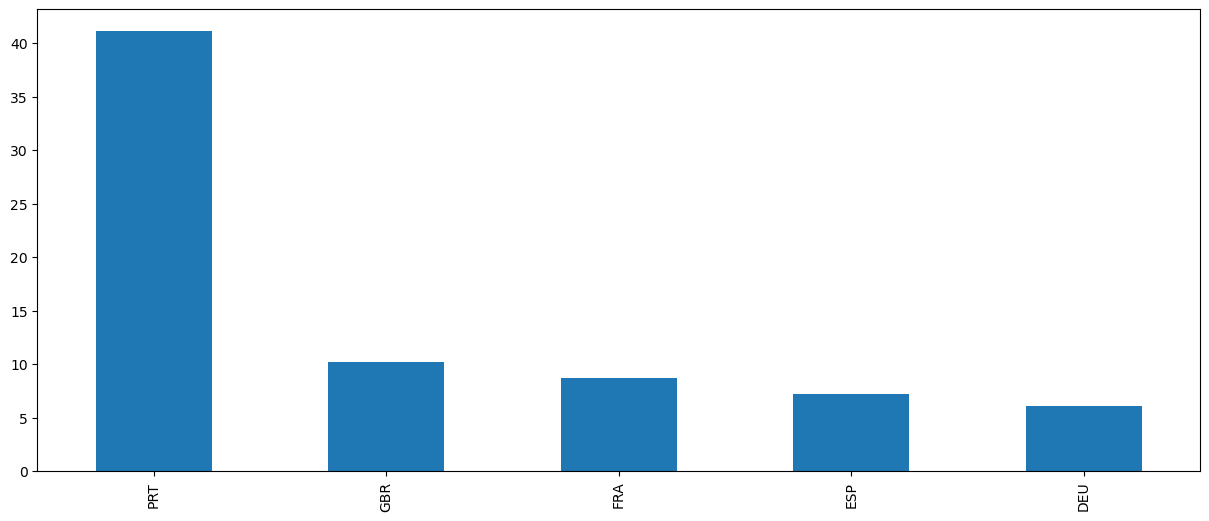

In [194]:
((df['country'].value_counts(normalize=True)*100).head()).plot(kind='bar')

we can see that the maximum number of bookings occured from Portugal, followed by Great Britain and France

# Market segment

<Axes: ylabel='market_segment'>

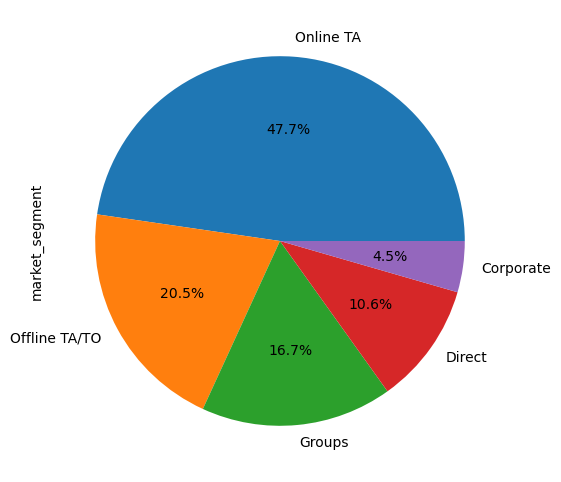

In [195]:
((df['market_segment'].value_counts(normalize=True)*100).head()).plot(kind='pie',autopct='%0.1f%%')

The maximum number of booking was done by the online travel agency which accounts for 47,7 percent of the total followed by offline travel agency with a contribution of 20.5 percent.

# Bivariate Analysis

<Axes: xlabel='hotel', ylabel='lead_time'>

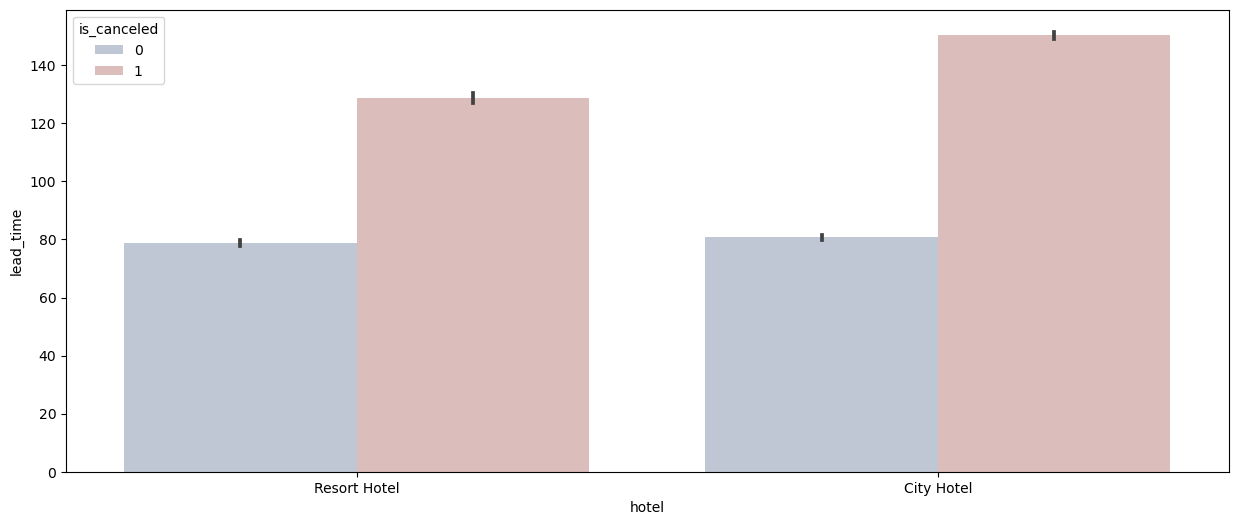

In [196]:
sns.barplot(x=df['hotel'],y=df['lead_time'],hue=df['is_canceled'],palette = 'vlag')

In both the hotels the bookings with more than a lead time of 80 days have higher chances of cancellations

<Axes: xlabel='is_canceled', ylabel='count'>

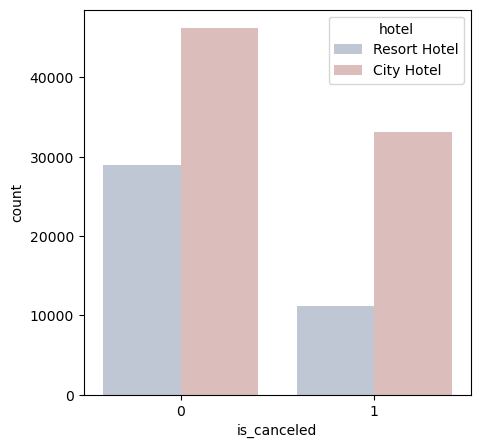

In [197]:
plt.figure(figsize=(5,5))
sns.countplot(x = df['is_canceled'],palette='vlag',hue=df['hotel'])

In the cancelled bookings we can see that more number of cancellations occured at City hotel

<Axes: xlabel='customer_type', ylabel='count'>

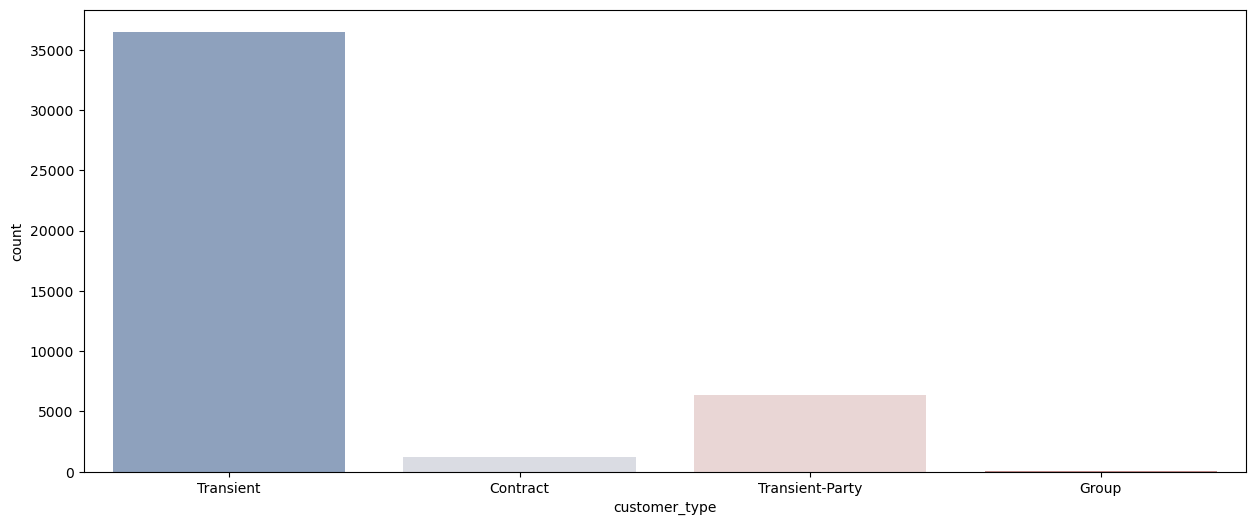

In [198]:
cancelled = df[df['is_canceled']==1]
sns.countplot(x=cancelled['customer_type'],palette='vlag')

The ones with customer_type as transient are the ones with a short stay who have no special requirements, notably the cancellations are higher for the transient customer_types

# Assumption-1

The earlier the booking made, higher the chances of cancellation.

<Axes: xlabel='lead_time', ylabel='Count'>

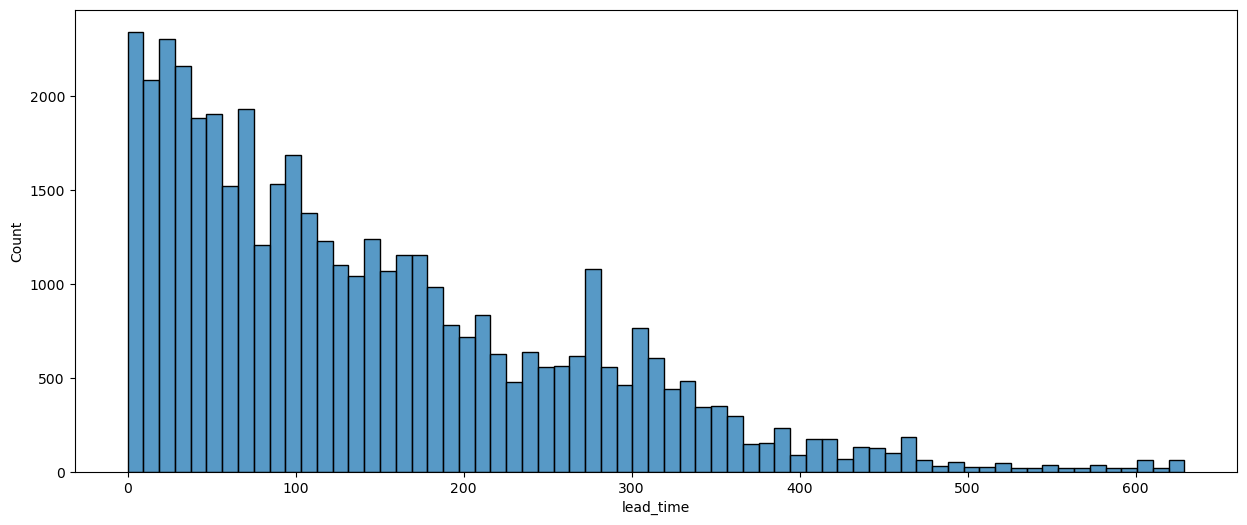

In [199]:
sns.histplot(cancelled['lead_time'])

## Inference
Higher the lead time lesser the cancellation, this disapproves our assumption 1

In [253]:
# hypothesis testing 
# H0 - null hypothesis - Lead time does not impact cancellation
# H1 - alternate hypotesis - Lead time has impact on cancellations
# right tailed test

In [201]:
cancelled = df[df['is_canceled'] == 1]['lead_time']
not_cancelled = df[df['is_canceled'] == 0]['lead_time']

In [202]:
stats.ttest_ind(a=not_cancelled,b=cancelled,alternative='greater')

Ttest_indResult(statistic=-105.93487739055686, pvalue=1.0)

Failed to reject null hypothesis.
Failing to reject the null hypothesis, states that the lead time does not have an impact on cancellations

# Assumption - 2

If there are high previous cancellations, possibility of cancellation of current booking is also high.

In [203]:
previously_cancelled = df[df['previous_cancellations'] >= 1]

<Axes: xlabel='previous_cancellations', ylabel='count'>

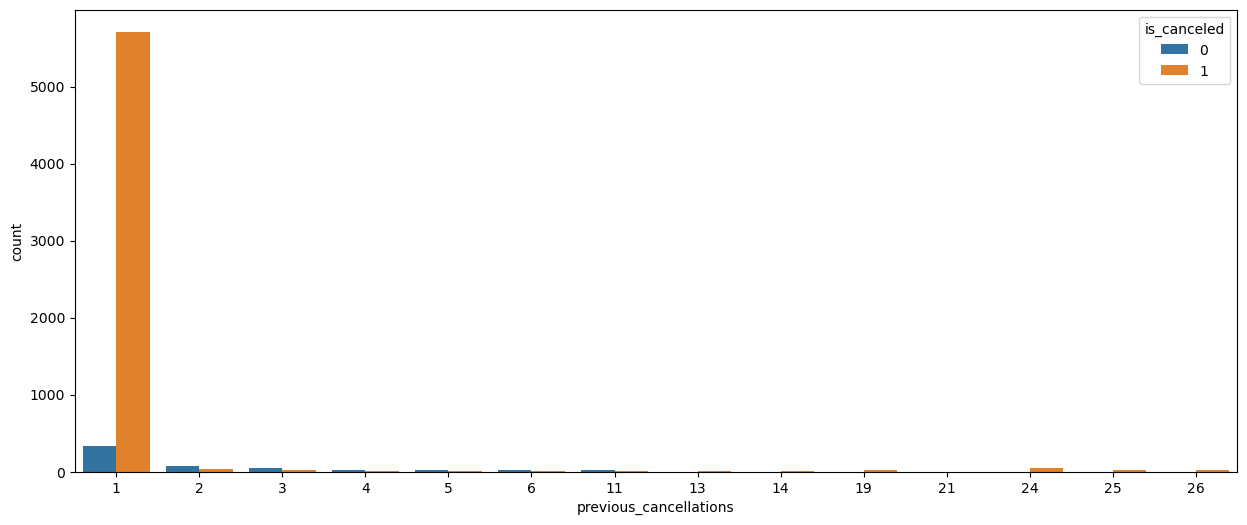

In [204]:
sns.countplot(x=previously_cancelled['previous_cancellations'],hue=previously_cancelled['is_canceled'])

## Inference

The customers who have booked earlier and the customers who have previously cancelled have a high chance to cancel their booking

In [205]:
# hypothesis
# H0 - null hypothesis
# The cancellation status of the current booking is independant of the previous cancellation.
# H1 - alternate hypothesis
# The cancellation status of the current booking is dependant of the previous cancellation.

In [206]:
cancelled = previously_cancelled[previously_cancelled['is_canceled'] == 1]['previous_cancellations']
not_cancelled = previously_cancelled[previously_cancelled['is_canceled'] == 0]['previous_cancellations']

In [207]:
stats.ttest_ind(a=not_cancelled,b=cancelled,alternative='greater')

Ttest_indResult(statistic=4.363347991353643, pvalue=6.5036876520562995e-06)

Rejecting null hypothesis, states that the current booking is dependant on the previous cancellation

# Assumption - 3

If room assigned is not the same as reserved room type, customer might positively cancel the booking

In [208]:
temp = df.loc[df['reserved_room_type']!=df['assigned_room_type']]
temp['is_canceled'].value_counts(normalize=True)*100

0    94.623584
1     5.376416
Name: is_canceled, dtype: float64

## Inference 

There are more cancellations when assigned room type is different from reserved room type is not valid. There are only 5% cancellations in such a case.

# Assumption - 4

Higher the number of changes made to the booking, lesser is the chance of cancellation due to the investment of time in curating the booking as per one's requirement.

<Axes: xlabel='booking_changes', ylabel='count'>

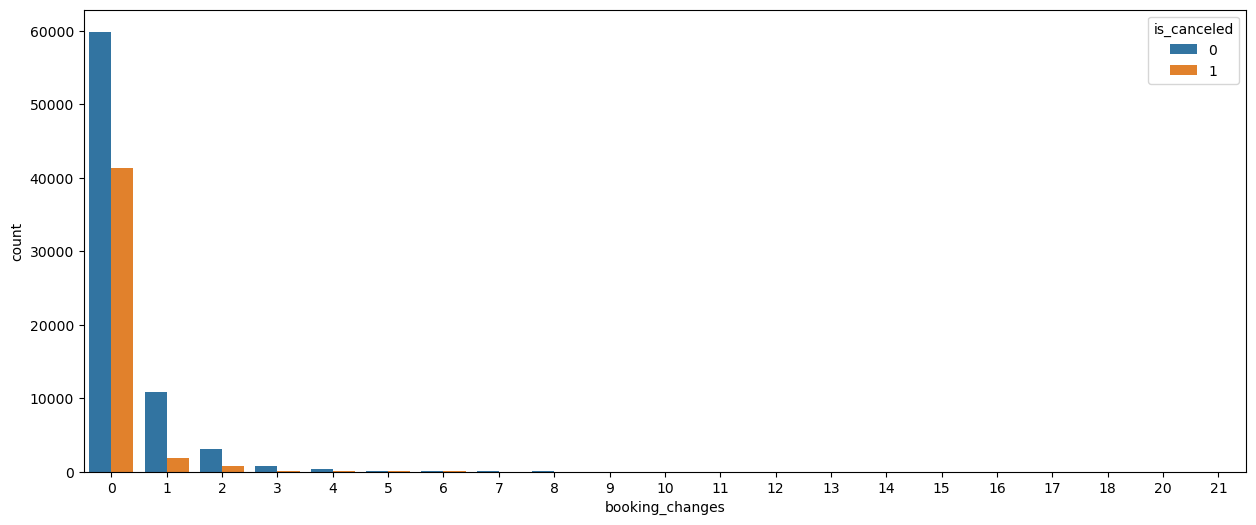

In [209]:
sns.countplot(data=df, x='booking_changes', hue='is_canceled')

## Inference

The bookings does not hold as there is no trend in it's impact on the cancellation of bookings.

In [252]:
# Hypothesis
# null - the booking changes does not have an impact on the cancellation
# alternate - the number of booking changes has an impact on the number of cancellations

In [211]:
changes = df[df['booking_changes'] > 1]

In [212]:
not_cancelled = changes[changes['is_canceled'] == 0]['booking_changes']
cancelled = changes[changes['is_canceled'] == 1]['booking_changes']

In [213]:
stats.ttest_ind(a=not_cancelled,b=cancelled,alternative='less')

Ttest_indResult(statistic=1.9535777521477449, pvalue=0.9745985018985022)

Failed to reject null hypothesis, the number of booking changes does not have an impact on the cancellation

# Asumption - 5

Bookings that are refundable or for which deposits were not made at the time of booking stand a high chance of cancelation.

<Axes: xlabel='deposit_type', ylabel='count'>

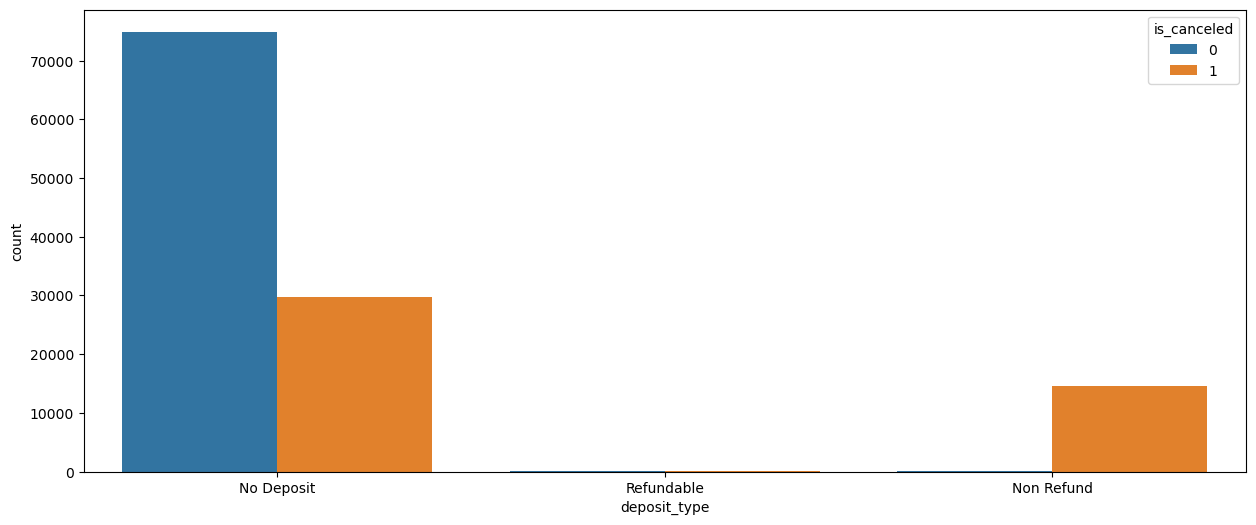

In [214]:
sns.countplot(x="deposit_type", hue="is_canceled",data=df)

## Inference
Most of the people with non refundable deposit type have cancelled

# Assumption - 6

Maximum booking occured in a year

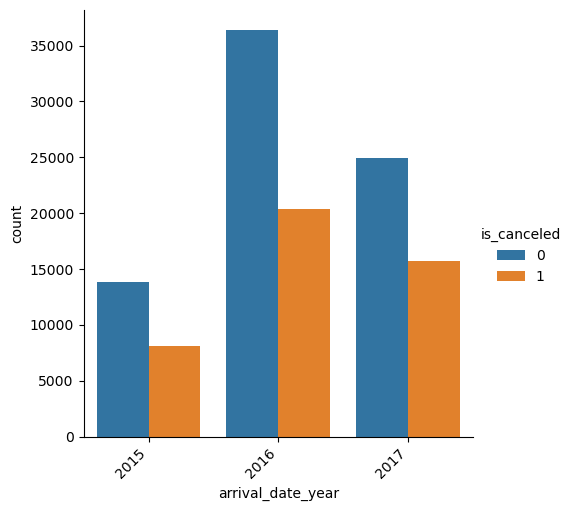

In [215]:
chart = sns.catplot(data=df, x='arrival_date_year', hue='is_canceled', kind='count')
chart.set_xticklabels(rotation=45, horizontalalignment='right')

## Inference 

From the above graph we could infer that the maximum number of bookings has ocured in the Year 2016

# Assumption - 7

Type of hotels that have longer waiting period

<Figure size 2900x600 with 0 Axes>

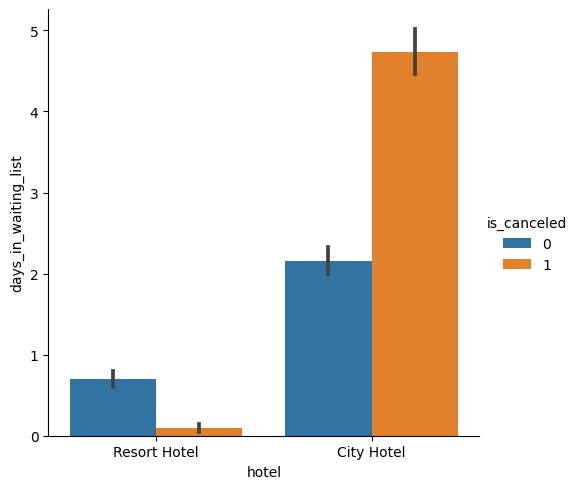

In [216]:
fig=plt.figure(figsize=(29,6))
sns.catplot(data=df, x='hotel', y='days_in_waiting_list',hue='is_canceled',kind='bar')

## Inference

city hotels have much longer waiting time in days compared to resort hotels which may signify that their demad is higher.

In [217]:
city_hotel = df[df['hotel'] == 'City Hotel']['days_in_waiting_list']
Resort_hotel = df[df['hotel'] == 'Resort Hotel']['days_in_waiting_list']

In [218]:
# Hypothesis testing
# H0 - City hotel has more waiting period
# H1 - Resort hotel has more waiting period

In [219]:
stats.ttest_ind(a=city_hotel,b=Resort_hotel,alternative='less')

Ttest_indResult(statistic=25.093064562539695, pvalue=1.0)

Failed to reject null hypothesis, the same can be observed from the graph that the city hotel has more waiting days

# Assumption - 8

Type of customers that cancelled most

Transient          75.059050
Transient-Party    21.043638
Contract            3.414021
Group               0.483290
Name: customer_type, dtype: float64


<Axes: xlabel='customer_type', ylabel='count'>

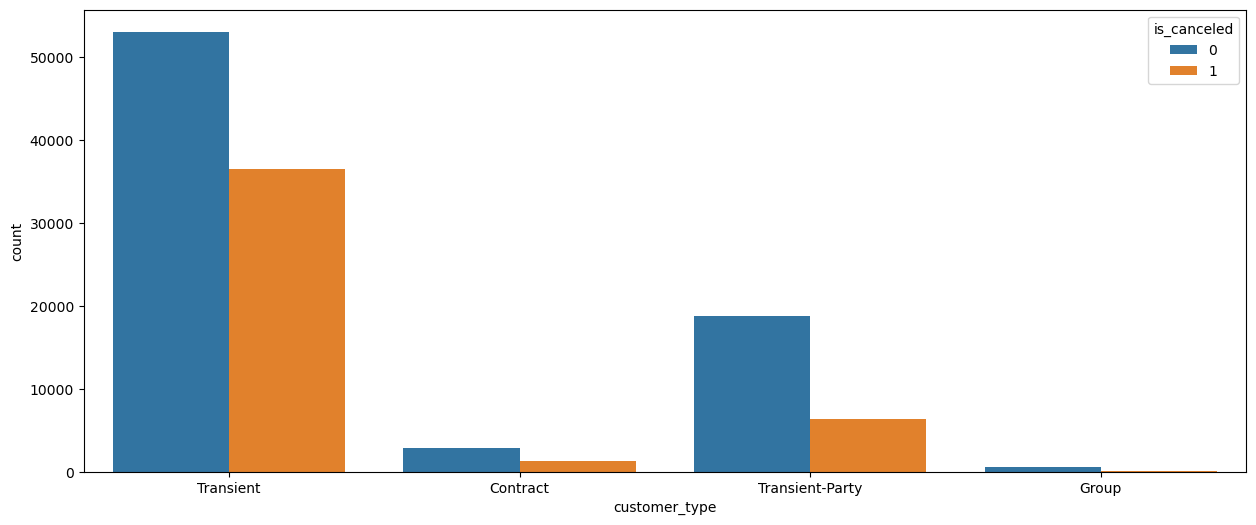

In [220]:
print(df['customer_type'].value_counts(normalize=True)*100)
sns.countplot(data=df, x='customer_type', hue='is_canceled')

## Inference 

75% bookings occur in Transient category of customers. It also sees the highest cancellation among all the categories

# Assumption - 9

Month in every year with most cancelations

<Axes: xlabel='arrival_date_year,arrival_date_month'>

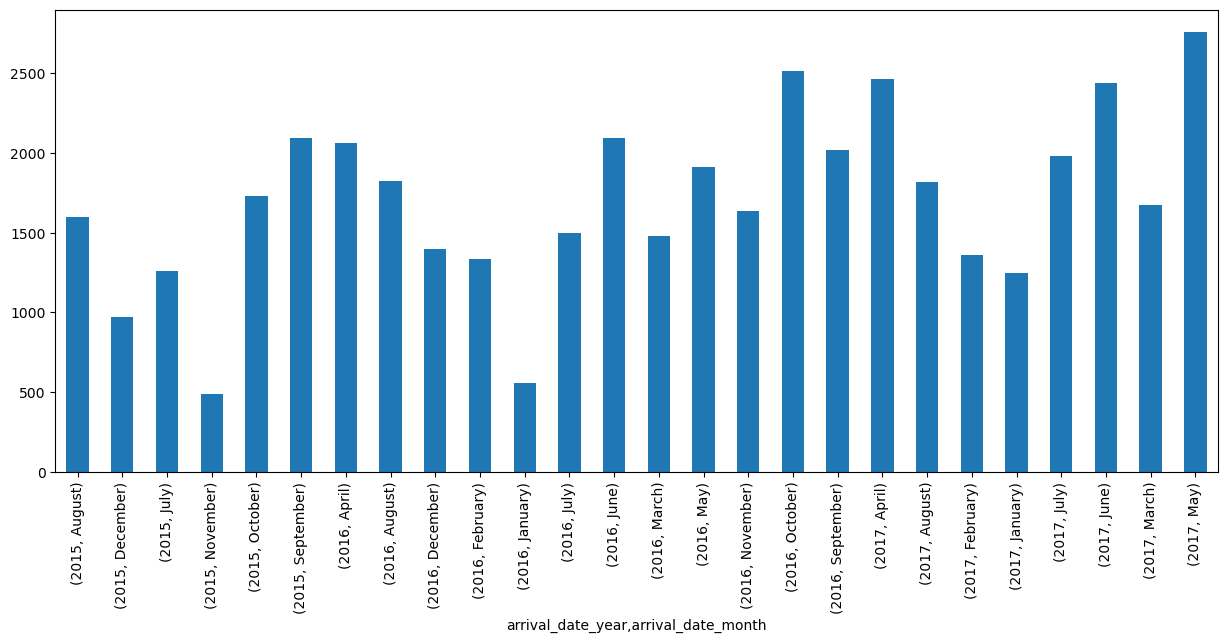

In [221]:
cancelled = df[df['is_canceled']==1]

cancelled.groupby(['arrival_date_year','arrival_date_month'])['is_canceled'].count().plot(kind='bar')

## Inference

1. For the year 2015 it is observed that the maximum number of cancellations occured in the month of september.
2. For the year 2016 it is observed that the maximum number of cancellations occured in the month of October.
3. For the year 2017 it is observed that the maximum number of cancellations occured in the month of May.

# Assumption - 10

Bookings that are refundable or for which deposits were not made at the time of booking stand a high chance of cancelation.
If the number of days in waiting list is significant, customer might make some other booking due to uncertainty of confirmation of current booking.

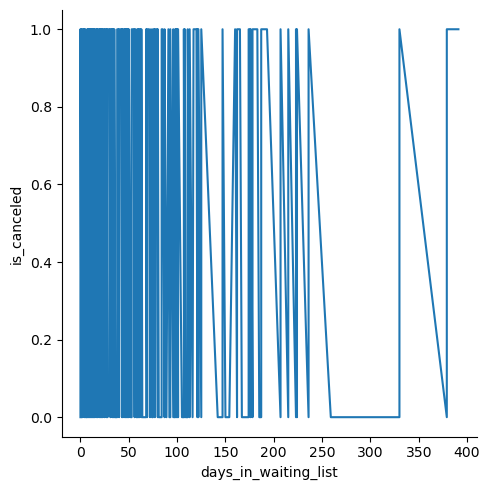

In [222]:
sns.relplot(data=df, x='days_in_waiting_list', y='is_canceled', kind='line', estimator=None)

No relation can be established between days_in_waiting_list and is_canceled. Therefore, we will take this feature for further analysis. 

# Outlier detection

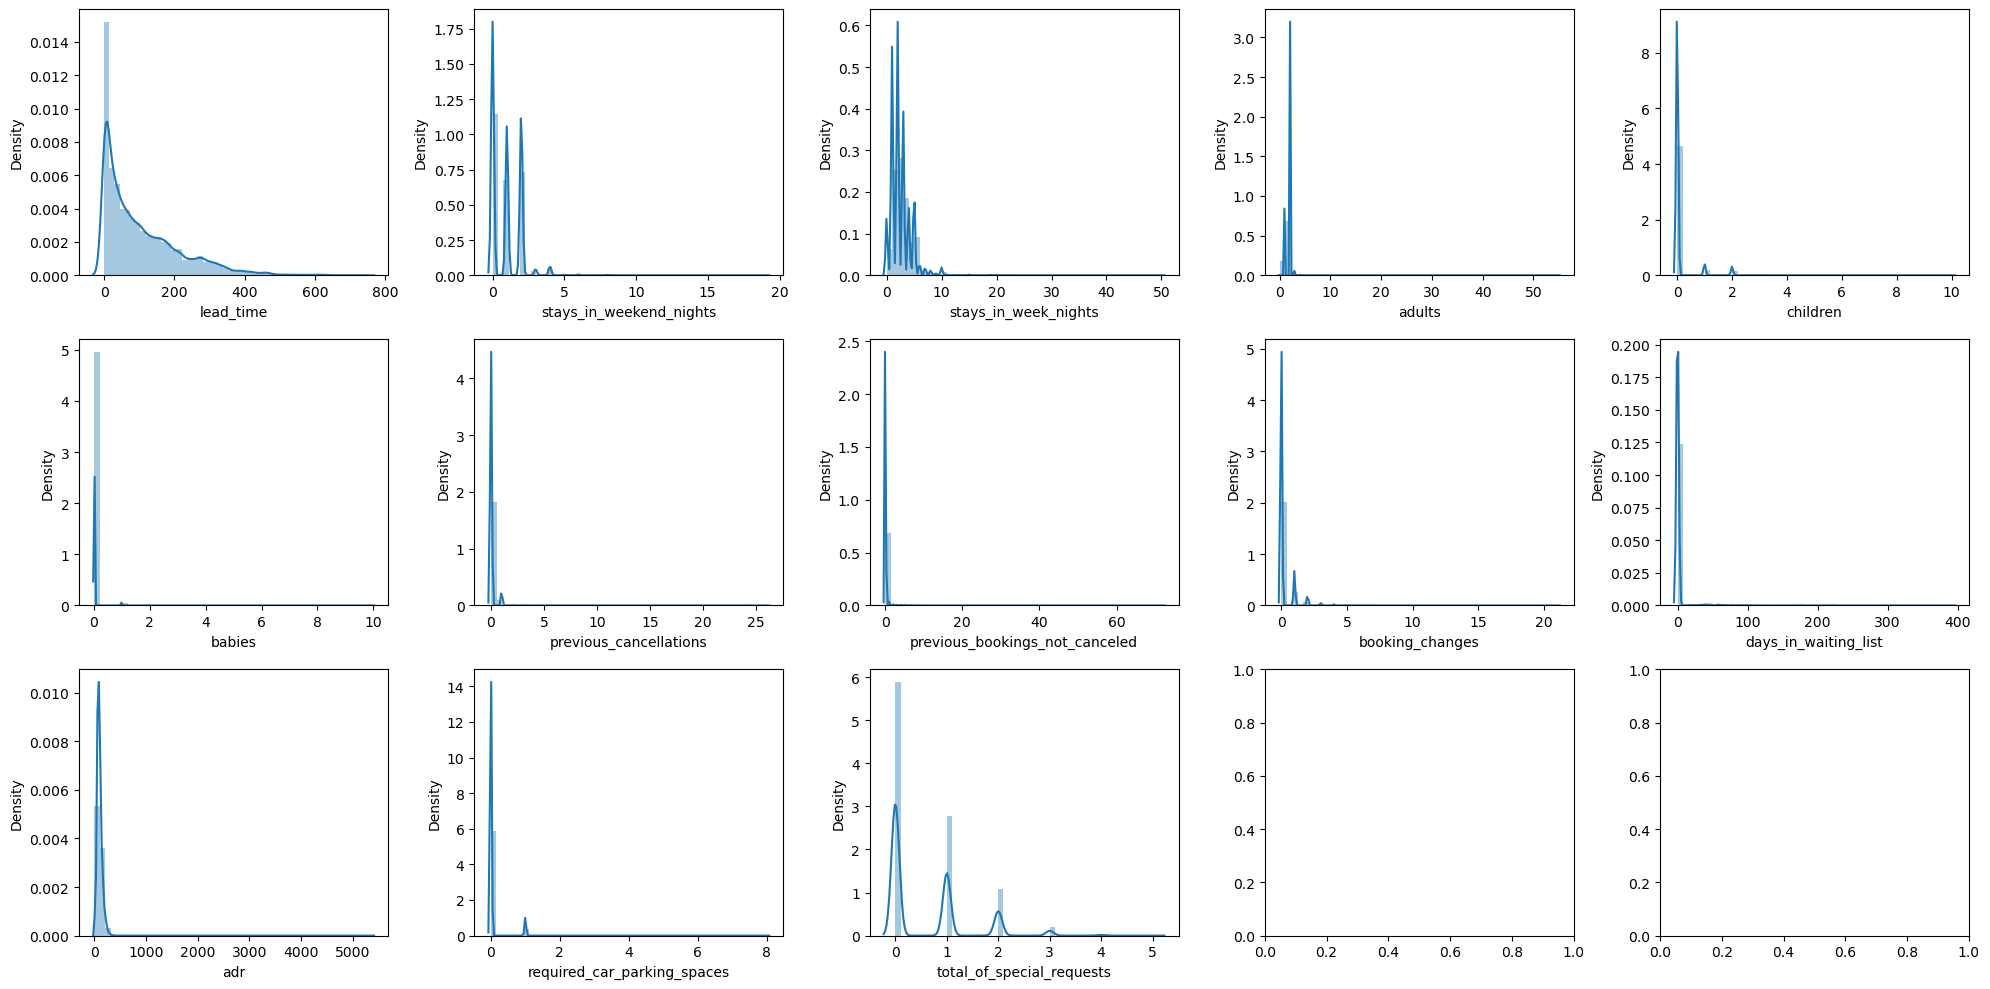

In [223]:
fig, ax= plt.subplots(3,5, figsize=(20,10))

for i, subplot in zip(numerical.columns, ax.flatten()):
    sns.distplot(df[i], ax=subplot,kde=True)
    
plt.tight_layout()
plt.show()

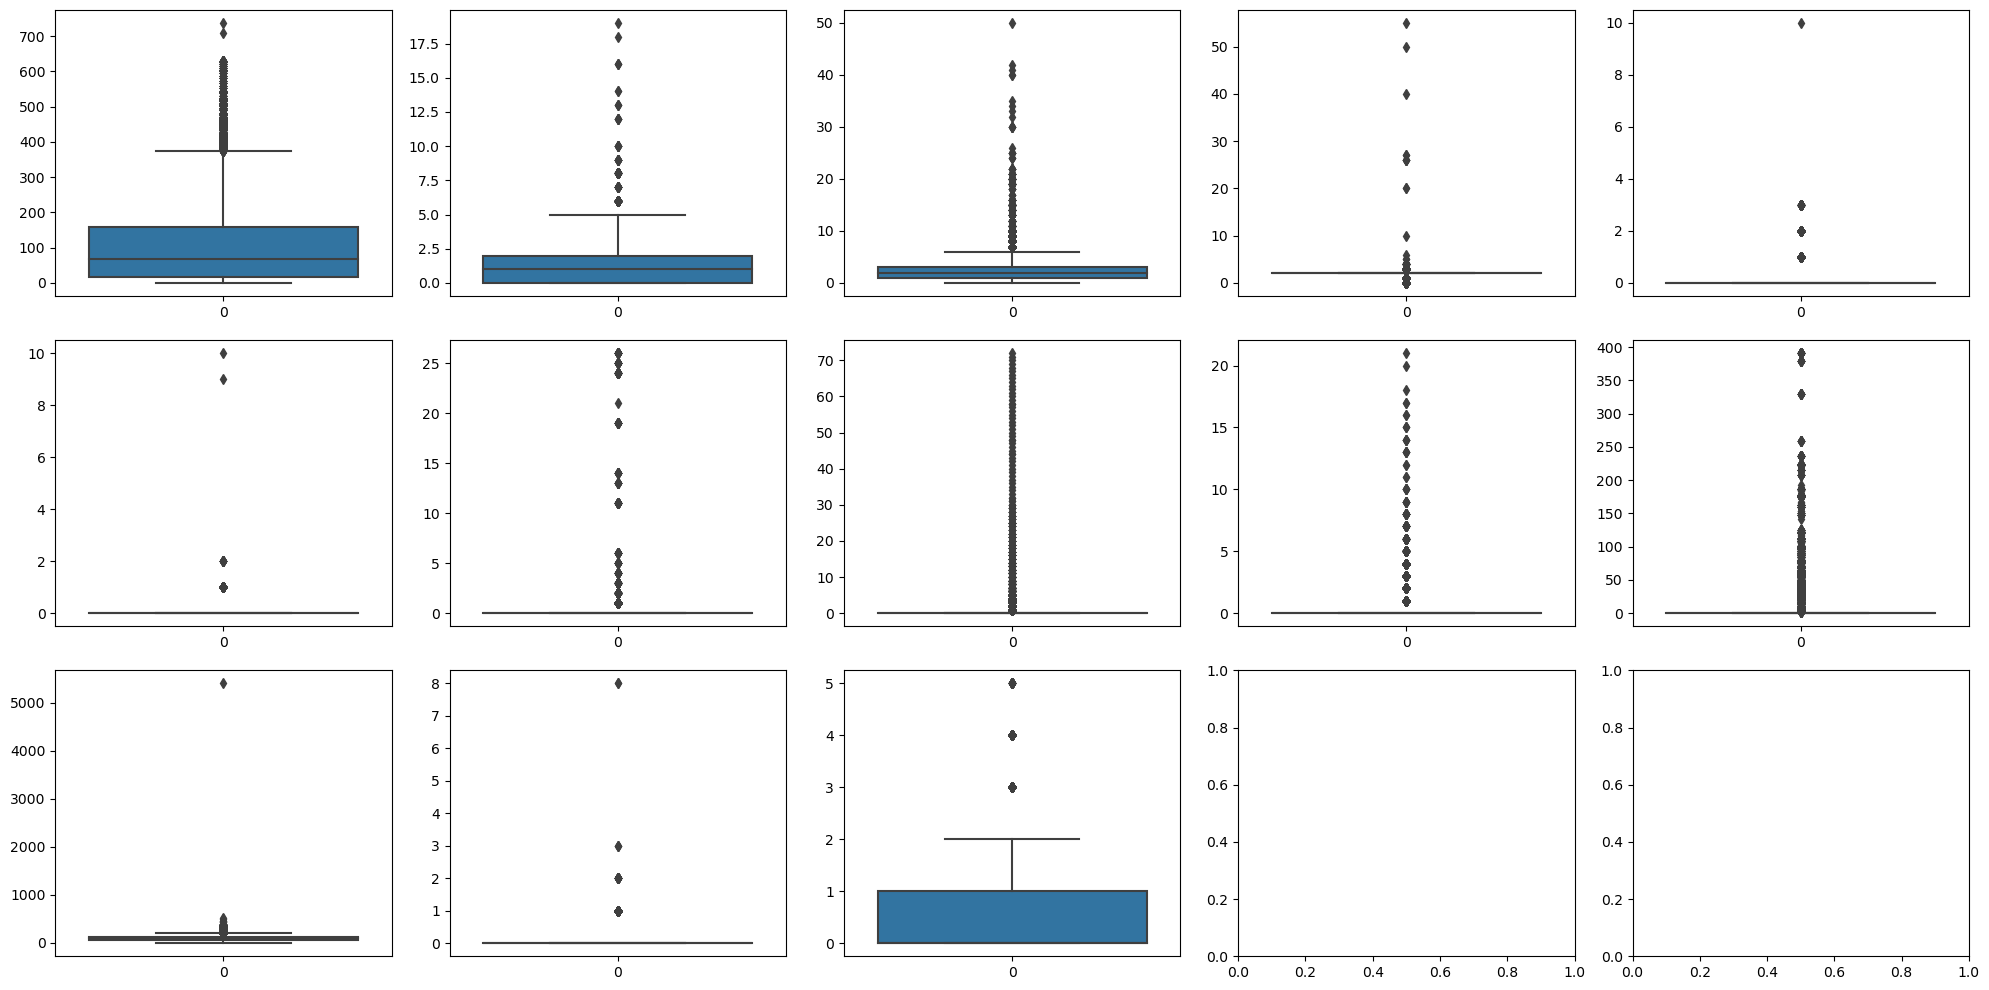

In [224]:
fig, ax= plt.subplots(3,5, figsize=(20,10))

for i, subplot in zip(numerical.columns, ax.flatten()):
    sns.boxplot(df[i], ax=subplot)
    
plt.tight_layout()
plt.show()

## There are presence of outliers
The data exhibits a slight right-skew, as evident from the distribution plots. Notably, the presence of numerous data points exceeding the upper whisker boundary strongly suggests the existence of outliers within the dataset.

# Feature Engineering

Babies and children are combined for a more meaningful data

In [225]:
df['kids'] = df['children'] + df['babies'] # combining kids and babies

In [226]:
df['kids'].value_counts()

0.0     110058
1.0       5446
2.0       3772
3.0        111
10.0         2
9.0          1
Name: kids, dtype: int64

In [227]:
df = df.drop(['children','babies'],axis=1)

In [228]:
df['total_members'] = df['kids'] + df['adults']

Combining the kids and adults to get the family size and coverting them to object data type based on the family size
for better understanding

In [229]:
def categorize_family(value):
    if value < 3:
        return 'small family'
    elif 3 <= value <= 5:
        return 'medium family'
    else:
        return 'large family'

In [230]:
df['family_size'] = df['total_members'].apply(categorize_family)

In [231]:
df = df.drop(['adults','kids'],axis=1)

In [232]:
df = df.drop('total_members',axis=1)

Changing the months according to seasons

In [233]:
df['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [234]:
def season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    elif month in ['September', 'October', 'November']:
        return 'Fall'
    else:
        return 'Unknown'

In [235]:
df['season'] = df['arrival_date_month'].apply(season)

Dropping the columns arrival date year, arrival date month, arrival date day of month as
they are redundant with the column reservation status date

In [236]:
df = df.drop(['arrival_date_year','arrival_date_month',
              'arrival_date_week_number','arrival_date_day_of_month'],axis=1)

If the room type is assigned as same as the reserved its denoted as same else different

In [237]:
df['room_type'] = np.where(df['reserved_room_type'] == df['assigned_room_type'], 'reserved and assigned are same', 'reserved and assigned are different')

In [238]:
df = df.drop(['reserved_room_type','assigned_room_type'],axis=1)

grouping the rows where the frequency is very less

In [239]:
df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [240]:
df['market_segment'] = df['market_segment'].replace({'Complementary':'other','Aviation':'other','Undefined':'other'})

In [241]:
df['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [242]:
df['distribution_channel'] = df['distribution_channel'].replace({'GDS':'other','Undefined':'other'})

In [243]:
df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [244]:
df['meal'] = df['meal'].replace({'FB':'other','Undefined':'other'})

Seperating the holidays and non holidays

In [245]:
df['Holidays'] = 'Non Holiday'
df.loc[df['reservation_status_date'].str.contains('-07-04'), 'Holidays'] = '4th of July'
df.loc[df['reservation_status_date'].str.contains('-01-01'), 'Holidays'] = "New Year's Day"
df.loc[df['reservation_status_date'].str.contains('-12-25'), 'Holidays'] = 'Christmas Day'
df.loc[df['reservation_status_date'].str.contains('-11-04'), 'Holidays'] = 'Thanksgiving Day'

Grouping the countries with their continents

In [246]:
africa = ['DZA', 'AGO', 'BEN', 'BWA', 'BFA', 'BDI', 'CPV', 'CMR', 'CAF', 'TCD', 'COM', 'COG', 'COD', 'CIV', 'DJI', 'EGY', 'GNQ', 'ERI', 'SWZ', 'ETH', 'GAB', 'GMB', 'GHA', 'GIN', 'GNB', 'KEN', 'LSO', 'LBR', 'LBY', 'MDG', 'MWI', 'MLI', 'MRT', 'MUS', 'MAR', 'MOZ', 'NAM', 'NER', 'NGA', 'RWA', 'STP', 'SEN', 'SYC', 'SLE', 'SOM', 'ZAF', 'SSD', 'SDN', 'TZA', 'TGO', 'TUN', 'UGA', 'ZMB', 'ZWE']
asia = ['AFG', 'ARM', 'AZE', 'BHR', 'BGD', 'BTN', 'BRN', 'KHM', 'CHN', 'CYP', 'GEO', 'IND', 'IDN', 'IRN', 'IRQ', 'ISR', 'JPN', 'JOR', 'KAZ', 'KWT', 'KGZ', 'LAO', 'LBN', 'MYS', 'MDV', 'MNG', 'MMR', 'NPL', 'PRK', 'OMN', 'PAK', 'PSE', 'PHL', 'QAT', 'SAU', 'SGP', 'KOR', 'LKA', 'SYR', 'TWN', 'TJK', 'THA', 'TLS', 'TUR', 'TKM', 'ARE', 'UZB', 'VNM', 'YEM']
europe = ['ALB', 'AND', 'AUT', 'BLR', 'BEL', 'BIH', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'XKX', 'LVA', 'LIE', 'LTU', 'LUX', 'MLT', 'MDA', 'MCO', 'MNE', 'NLD', 'MKD', 'NOR', 'POL', 'PRT', 'ROU', 'RUS', 'SMR', 'SRB', 'SVK', 'SVN', 'ESP', 'SWE', 'CHE', 'UKR', 'GBR', 'VAT']
north_america = ['CAN', 'USA', 'MEX']
central_america_caribbean = ['ATG', 'BHS', 'BRB', 'BLZ', 'CRI', 'CUB', 'DMA', 'DOM', 'SLV', 'GRD', 'GTM', 'HTI', 'HND', 'JAM', 'NIC', 'PAN', 'KNA', 'LCA', 'VCT', 'TTO']
south_america = ['ARG', 'BOL', 'BRA', 'CHL', 'COL', 'ECU', 'GUY', 'PRY', 'PER', 'SUR', 'URY', 'VEN']
oceania = ['AUS', 'FJI', 'KIR', 'MHL', 'FSM', 'NRU', 'NZL', 'PLW', 'PNG', 'WSM', 'SLB', 'TON', 'TUV', 'VUT']

In [247]:
def countries(i):
        if i in africa:
            return 'Africa'
        elif i in asia:
            return 'Asia'
        elif i in europe:
            return 'Europe'
        elif i in north_america:
            return 'North America'
        elif i in central_america_caribbean:
            return 'Central America and Caribbean'
        elif i in south_america:
            return 'South America'
        elif i in oceania:
            return 'Oceania'
        else:
            return 'Other Regions'

In [248]:
df['region']=df['country'].apply(countries)


In [250]:
df['region'].value_counts(normalize=True)*100

Europe                           90.692688
Asia                              2.633386
South America                     2.268197
North America                     1.827624
Other Regions                     1.165089
Africa                            0.930564
Oceania                           0.421308
Central America and Caribbean     0.061144
Name: region, dtype: float64

In [111]:
df = df.drop('country',axis=1)

Grouping the agents based on the number of bookings they have done

In [112]:
agent_counts = df.groupby('agent')['is_canceled'].count()
sorted_agent_counts = agent_counts.sort_values(ascending=False)

In [113]:
sorted_agent_counts.head()

agent
9.0      48301
240.0    13922
1.0       7191
14.0      3640
7.0       3539
Name: is_canceled, dtype: int64

In [114]:
sorted_agent_counts.describe()

count      333.000000
mean       358.528529
std       2800.561550
min          1.000000
25%          3.000000
50%         24.000000
75%        100.000000
max      48301.000000
Name: is_canceled, dtype: float64

In [115]:
df['agent'] = pd.cut(df['agent'],bins=[0,3,100,58301],labels=['agents with lower booking count','agents with moderate booking count','agents with higher booking count'])

In [116]:
df

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,family_size,season,room_type,Holidays,region
0,Resort Hotel,0,342,0,0,BB,Direct,Direct,0,0,0,3,No Deposit,agents with moderate booking count,0,Transient,0.00,0,0,2015-07-01,small family,Summer,reserved and assigned are same,Non Holiday,Europe
1,Resort Hotel,0,737,0,0,BB,Direct,Direct,0,0,0,4,No Deposit,agents with moderate booking count,0,Transient,0.00,0,0,2015-07-01,small family,Summer,reserved and assigned are same,Non Holiday,Europe
2,Resort Hotel,0,7,0,1,BB,Direct,Direct,0,0,0,0,No Deposit,agents with moderate booking count,0,Transient,75.00,0,0,2015-07-02,small family,Summer,reserved and assigned are different,Non Holiday,Europe
3,Resort Hotel,0,13,0,1,BB,Corporate,Corporate,0,0,0,0,No Deposit,agents with higher booking count,0,Transient,75.00,0,0,2015-07-02,small family,Summer,reserved and assigned are same,Non Holiday,Europe
4,Resort Hotel,0,14,0,2,BB,Online TA,TA/TO,0,0,0,0,No Deposit,agents with higher booking count,0,Transient,98.00,0,1,2015-07-03,small family,Summer,reserved and assigned are same,Non Holiday,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2,5,BB,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,agents with higher booking count,0,Transient,96.14,0,0,2017-09-06,small family,Summer,reserved and assigned are same,Non Holiday,Europe
119386,City Hotel,0,102,2,5,BB,Online TA,TA/TO,0,0,0,0,No Deposit,agents with moderate booking count,0,Transient,225.43,0,2,2017-09-07,medium family,Summer,reserved and assigned are same,Non Holiday,Europe
119387,City Hotel,0,34,2,5,BB,Online TA,TA/TO,0,0,0,0,No Deposit,agents with moderate booking count,0,Transient,157.71,0,4,2017-09-07,small family,Summer,reserved and assigned are same,Non Holiday,Europe
119388,City Hotel,0,109,2,5,BB,Online TA,TA/TO,0,0,0,0,No Deposit,agents with moderate booking count,0,Transient,104.40,0,0,2017-09-07,small family,Summer,reserved and assigned are same,Non Holiday,Europe


In [117]:
df = df.drop('reservation_status_date',axis=1)

In [118]:
list1 = ['hotel','meal','market_segment','distribution_channel','deposit_type','agent','customer_type','family_size','season','room_type','region','Holidays']

encoded_df = pd.get_dummies(df[list1], columns=list1)

df = pd.concat([df, encoded_df], axis=1)

df.drop(columns=list1, inplace=True)


In [119]:
df['is_repeated_guest'] = df['is_repeated_guest'].astype(int)

In [120]:
x = df.drop('is_canceled',axis=1)
y = df['is_canceled']

In [121]:
y = y.astype(int)

In [122]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.70,random_state=1)

In [123]:
xtrain.shape,ytrain.shape

((83573, 59), (83573,))

In [124]:
xtest.shape,ytest.shape

((35817, 59), (35817,))

## To reduce the skewness, we are transforming the xtrain and xtest seperately to avoid data leakage

In [125]:
columns_to_transform = ['lead_time','stays_in_weekend_nights','stays_in_week_nights','booking_changes',
                      'days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']

In [126]:
pt = PowerTransformer()

In [127]:
for i in columns_to_transform:
    xtrain[i] = pt.fit_transform(xtrain)

In [128]:
for i in columns_to_transform:
    xtest[i] = pt.fit_transform(xtest)

In [129]:
xtrain

,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_HB,meal_SC,meal_other,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_other,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_TA/TO,distribution_channel_other,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,agent_agents with lower booking count,agent_agents with moderate booking count,agent_agents with higher booking count,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,family_size_large family,family_size_medium family,family_size_small family,season_Fall,season_Spring,season_Summer,season_Winter,room_type_reserved and assigned are different,room_type_reserved and assigned are same,region_Africa,region_Asia,region_Central America and Caribbean,region_Europe,region_North America,region_Oceania,region_Other Regions,region_South America,Holidays_4th of July,Holidays_Christmas Day,Holidays_New Year's Day,Holidays_Non Holiday,Holidays_Thanksgiving Day
7318,1.888552,2.008956,2.008956,0,0,0,2.008956,2.008956,2.008956,2.008956,2.008956,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
36731,1.749248,1.848889,1.848889,0,0,0,1.848889,1.848889,1.848889,1.848889,1.848889,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
113168,0.205595,0.161167,0.161167,0,0,0,0.161167,0.161167,0.161167,0.161167,0.161167,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
7458,0.745732,0.730754,0.730754,0,0,0,0.730754,0.730754,0.730754,0.730754,0.730754,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
26498,-1.841212,-1.751949,-1.751949,0,0,0,-1.751949,-1.751949,-1.751949,-1.751949,-1.751949,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50057,0.676011,0.655738,0.655738,0,0,0,0.655738,0.655738,0.655738,0.655738,0.655738,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
98047,0.125489,0.079226,0.079226,0,0,0,0.079226,0.079226,0.079226,0.079226,0.079226,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
5192,-0.159651,-0.206044,-0.206044,0,0,0,-0.206044,-0.206044,-0.206044,-0.206044,-0.206044,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
77708,-1.841212,-1.751949,-1.751949,0,0,0,-1.751949,-1.751949,-1.751949,-1.751949,-1.751949,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [130]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)

In [131]:
ypred = model.predict(xtest)

In [132]:
from sklearn.metrics import classification_report

In [133]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84     22654
           1       0.84      0.49      0.62     13163

    accuracy                           0.78     35817
   macro avg       0.80      0.72      0.73     35817
weighted avg       0.79      0.78      0.76     35817



In [135]:
df['is_canceled'].value_counts(normalize=True)*100

0    62.958372
1    37.041628
Name: is_canceled, dtype: float64